In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, morlet
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from scipy.fftpack import fft

In [2]:
data = pd.read_csv('3hp_all_faults.csv')

In [10]:
#Definicje i dane
czas_probkowania = 1.0 / 24000  # 24 kHz próbkowanie
t = np.arange(0, len(data) * czas_probkowania, czas_probkowania)
fs = 24000
num_samples = 20000
sygnal_wibracyjny = data['DE_data'].values
klasy = data['fault'].unique()

In [4]:
widths = np.arange(1, 128)
wavelet = morlet

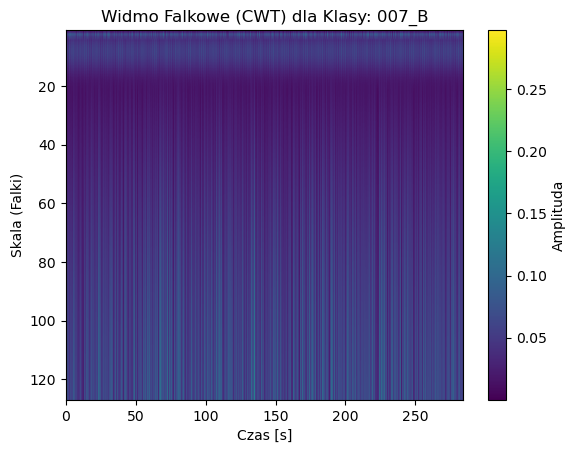

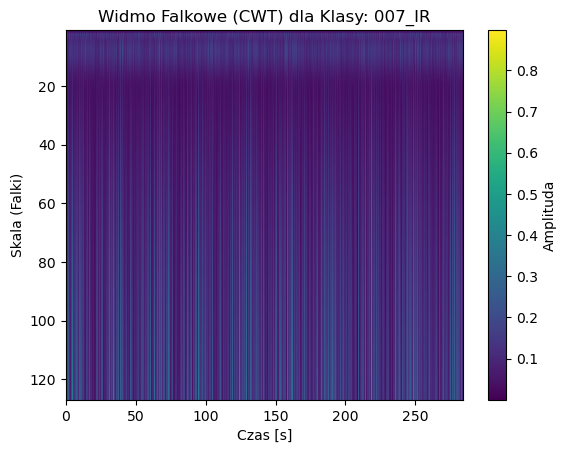

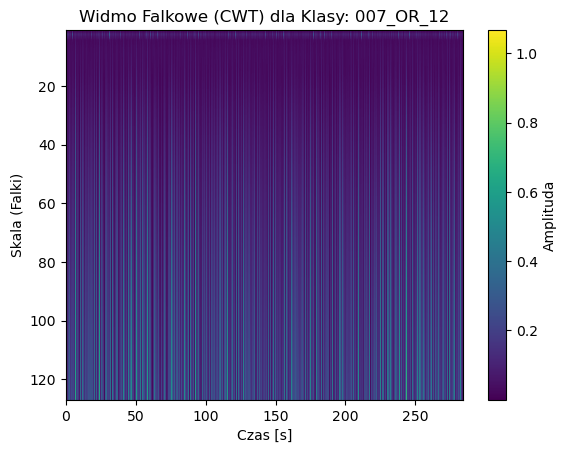

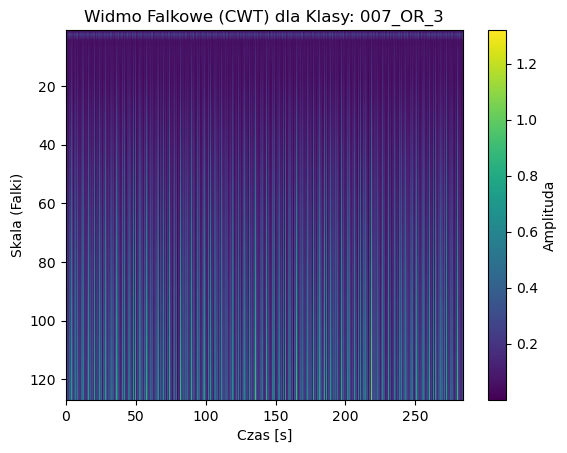

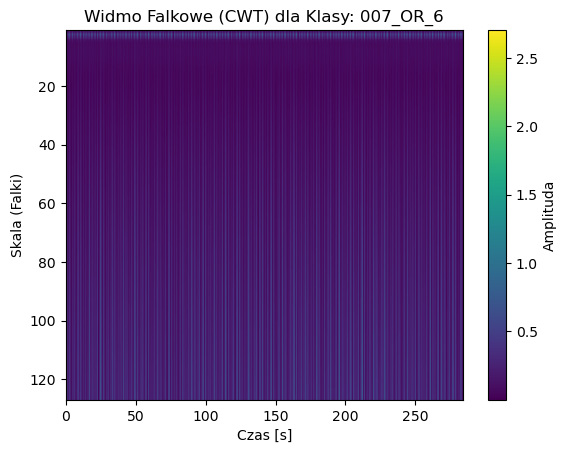

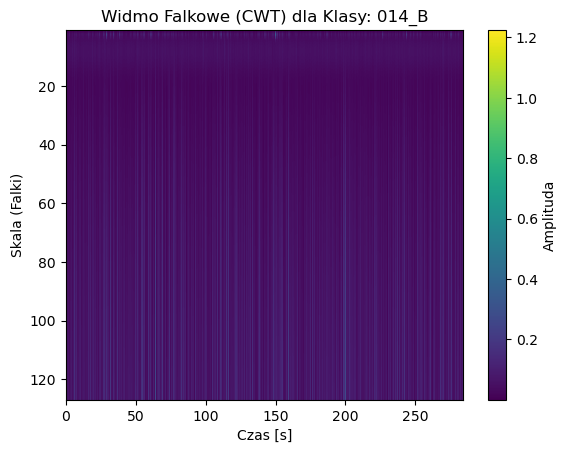

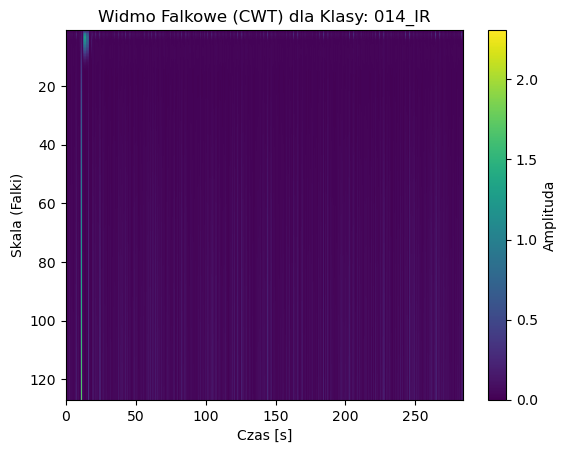

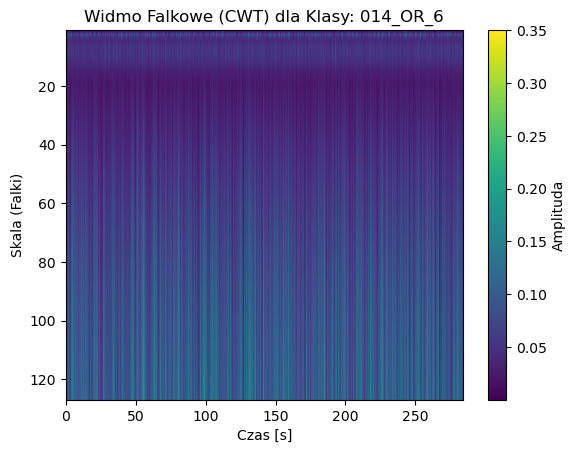

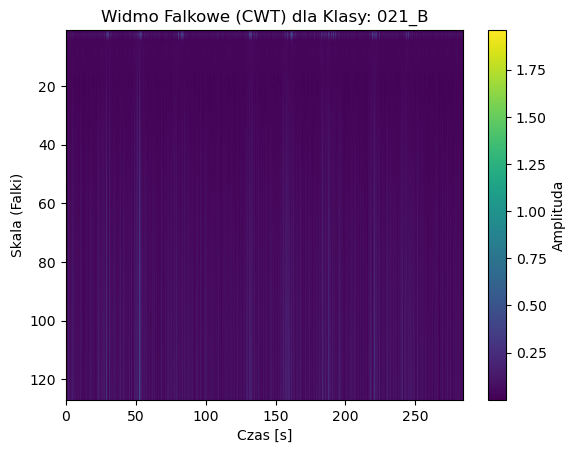

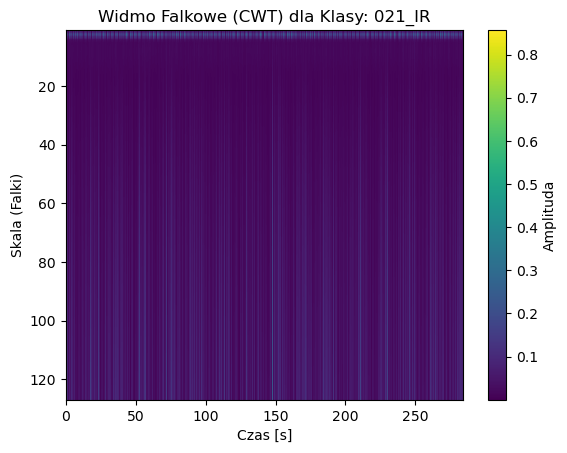

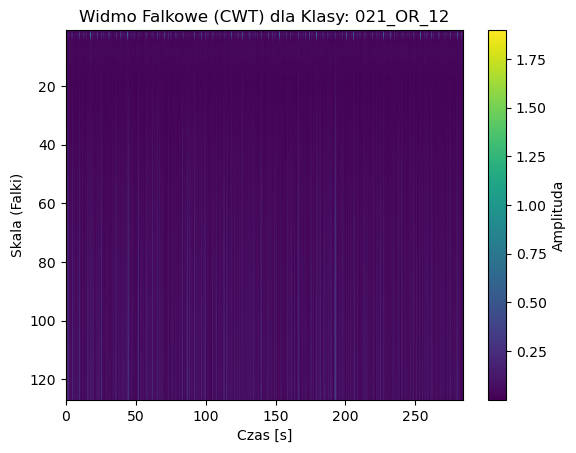

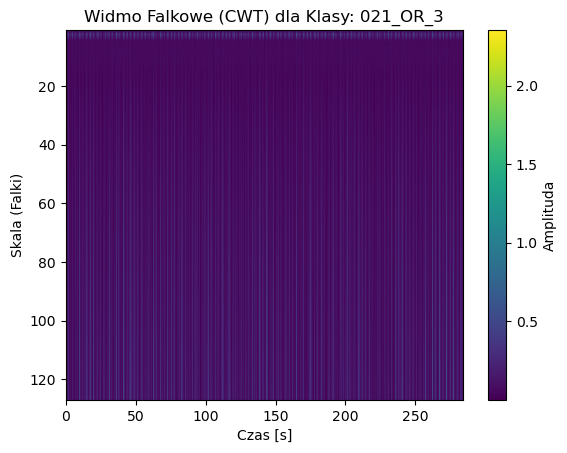

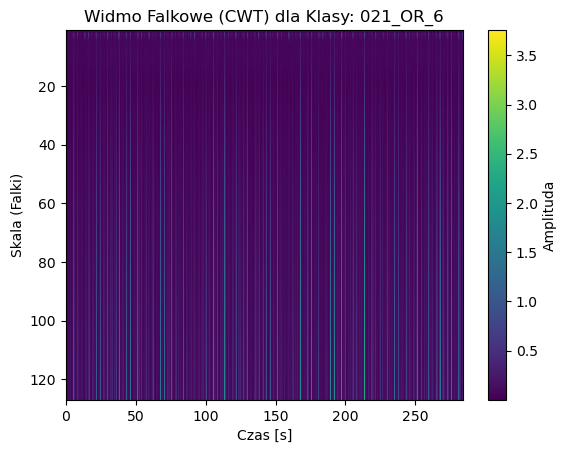

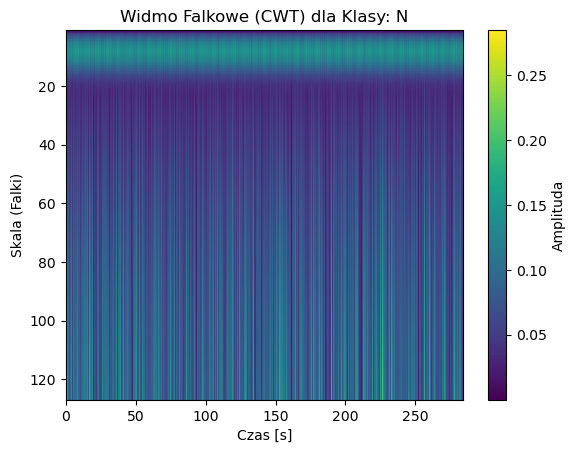

In [5]:
for klasa in klasy:
    # Filtracja danych dla danej klasy
    sygnal_klasy = sygnal_wibracyjny[data['fault'] == klasa]
    
    # Obliczanie CWT
    wartosci = cwt(sygnal_klasy, wavelet, widths)
    
    # Wykres widma czasowo-częstotliwościowego (CWT)
    plt.imshow(np.abs(wartosci), aspect='auto', extent=[min(t), max(t), max(widths), min(widths)])
    plt.colorbar(label='Amplituda')
    plt.ylabel('Skala (Falki)')
    plt.xlabel('Czas [s]')
    plt.title('Widmo Falkowe (CWT) dla Klasy: {}'.format(klasa))
    plt.show()

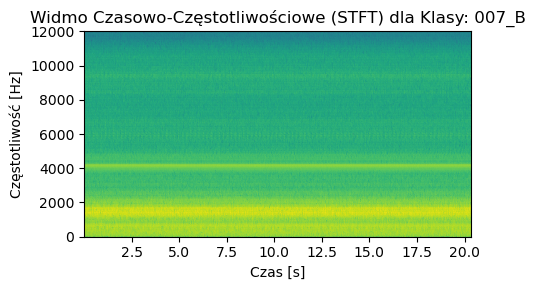

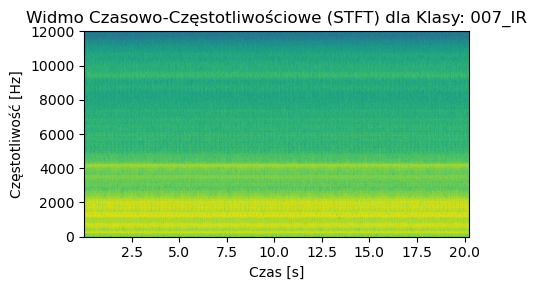

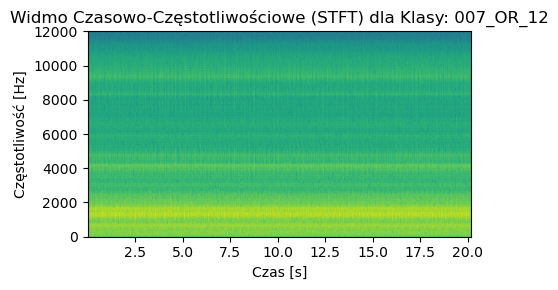

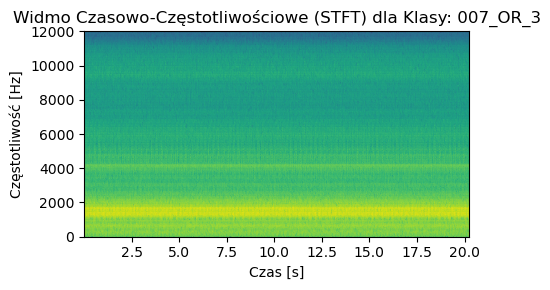

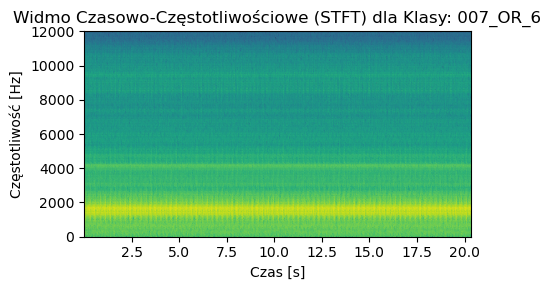

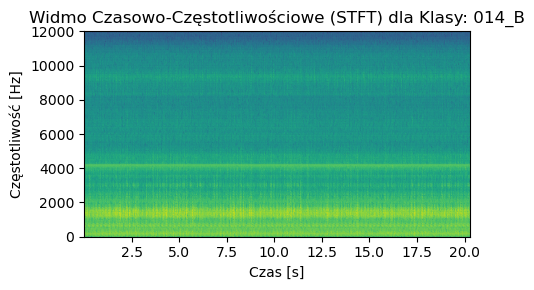

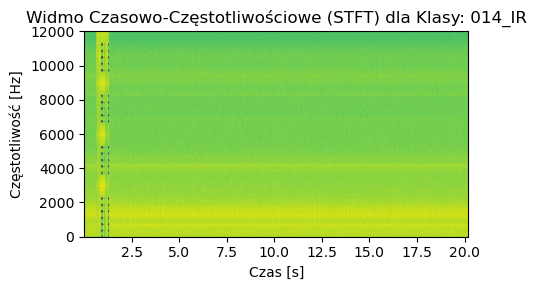

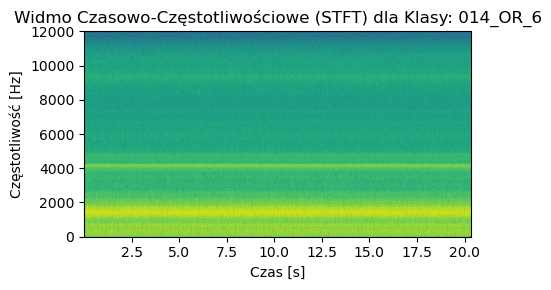

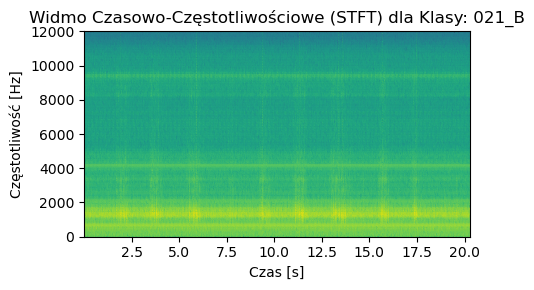

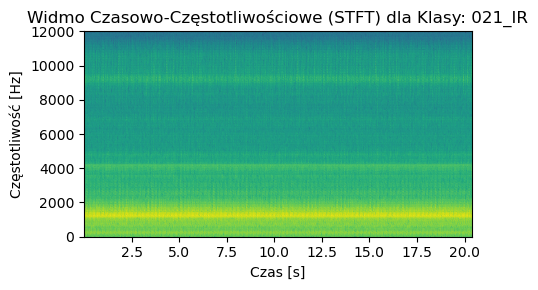

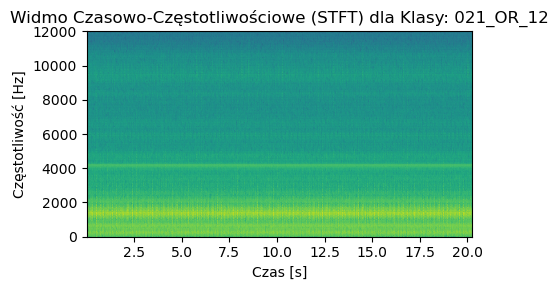

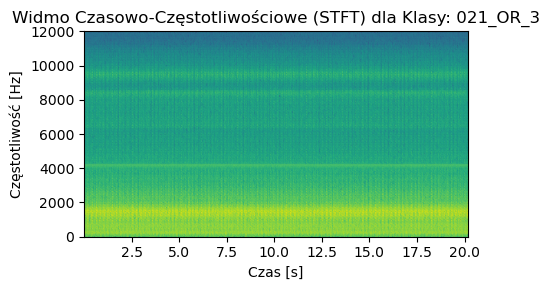

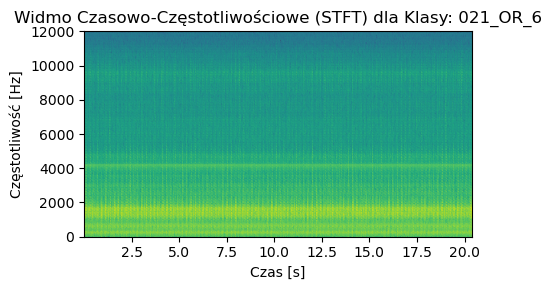

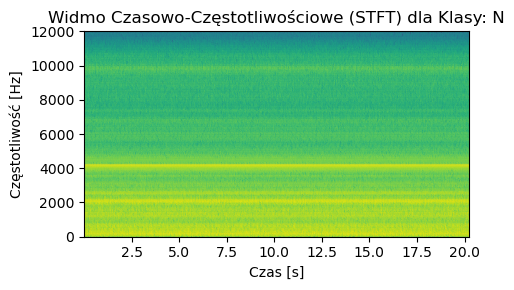

In [6]:
for klasa in klasy:
    # Filtracja danych dla danej klasy
    sygnal_klasy = data[data['fault'] == klasa]['DE_data'].values

    # Obliczanie STFT
    f_stft, t_stft, Sxx_stft = spectrogram(sygnal_klasy, fs=1.0/czas_probkowania)
    
    # Wyświetlanie widm czasowo-częstotliwościowych (STFT)
    plt.figure(figsize=(5, 3))
    plt.pcolormesh(t_stft, f_stft, 10 * np.log10(Sxx_stft), shading='gouraud')
    plt.ylabel('Częstotliwość [Hz]')
    plt.xlabel('Czas [s]')
    plt.title('Widmo Czasowo-Częstotliwościowe (STFT) dla Klasy: {}'.format(klasa))
    
    plt.tight_layout()
    plt.show()

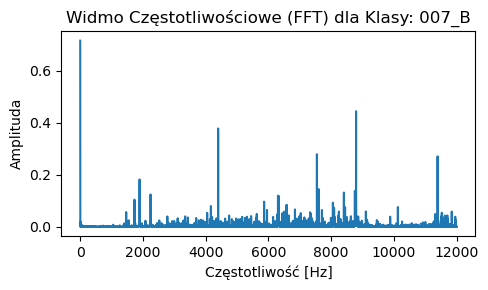

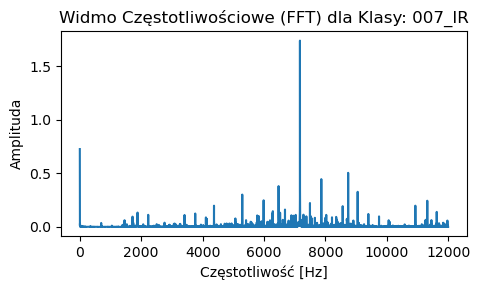

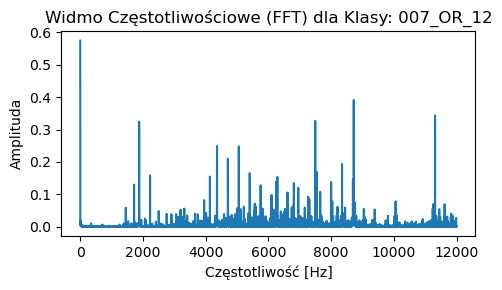

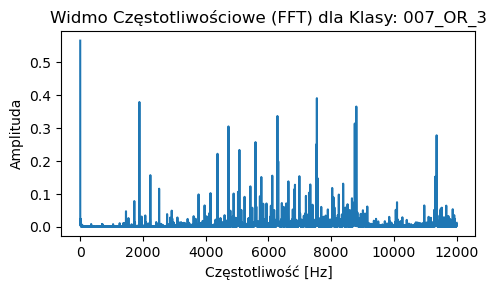

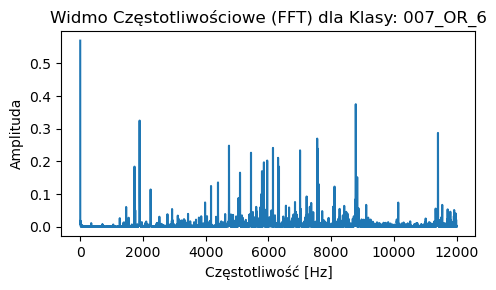

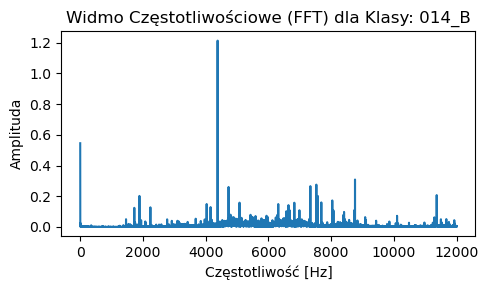

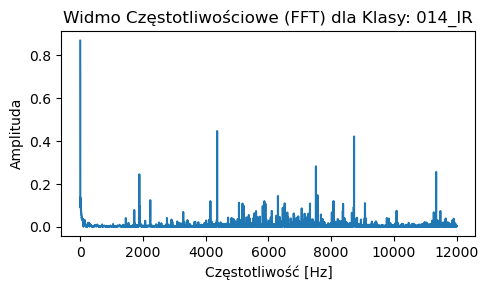

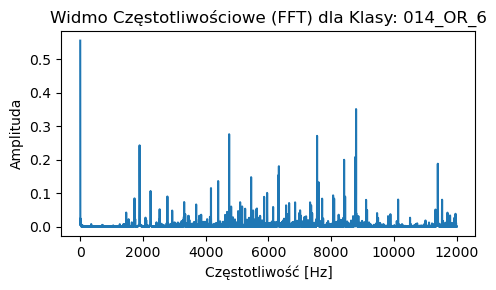

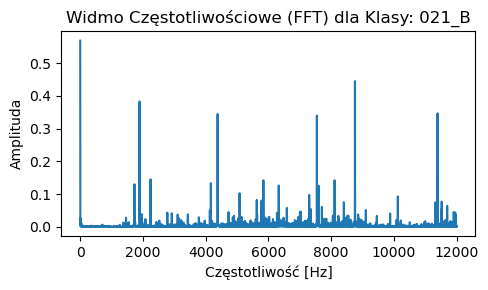

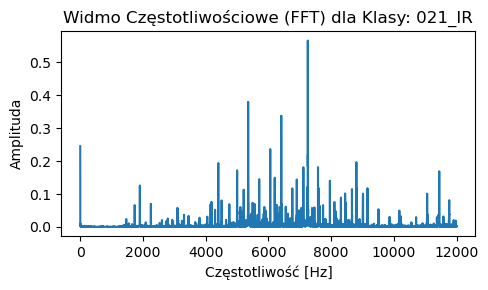

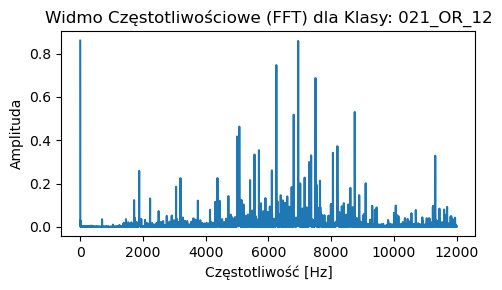

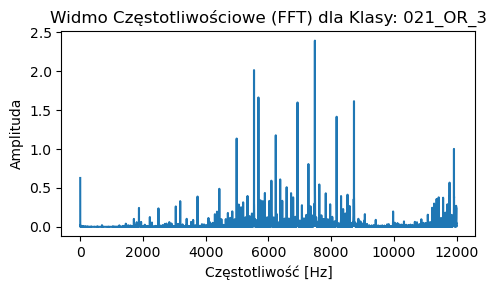

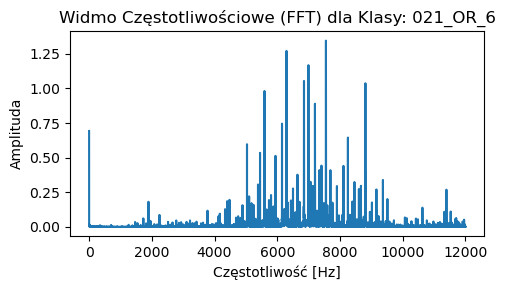

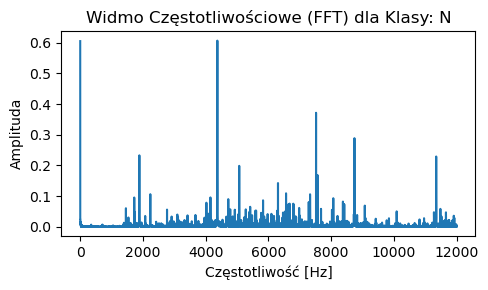

In [11]:
for klasa in klasy:
    # Filtracja danych dla danej klasy
    sygnal_klasy = data[data['fault'] == klasa]['DE_data'].values
    
    
    def apply_fft(x, fs, num_samples):
        f = np.linspace(0.0, (fs/2.0), num_samples//2)
        freq_values = fft(x)
        freq_values = 2.0/num_samples * np.abs(freq_values[0:num_samples//2])
        return f, freq_values

    f_normal, fft_normal = apply_fft((sygnal_klasy), fs, num_samples)
    
    # Wyświetlanie widma częstotliwościowe (FFT) tylko dla dodatnich częstotliwości
    plt.figure(figsize=(5, 3))
    plt.plot(f_normal, fft_normal)
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Amplituda')
    plt.title('Widmo Częstotliwościowe (FFT) dla Klasy: {}'.format(klasa))

    plt.tight_layout()
    plt.show()

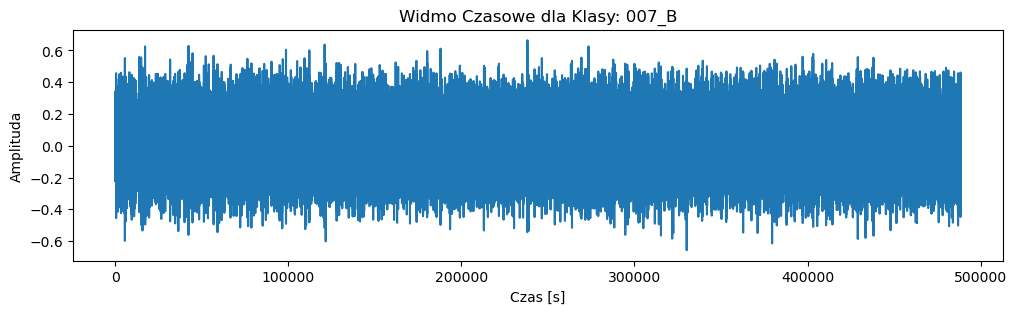

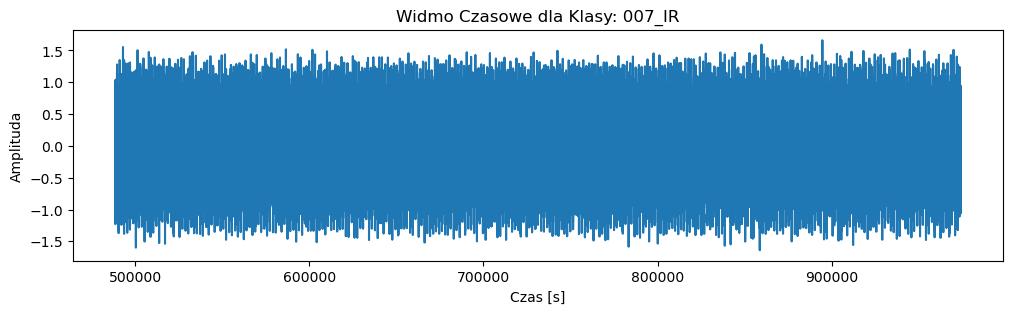

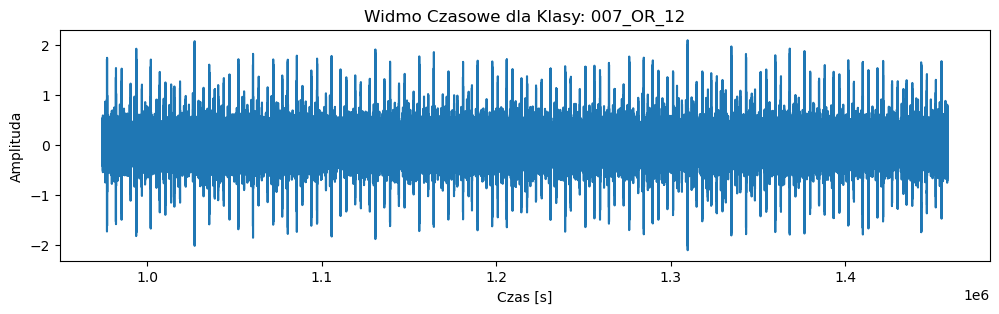

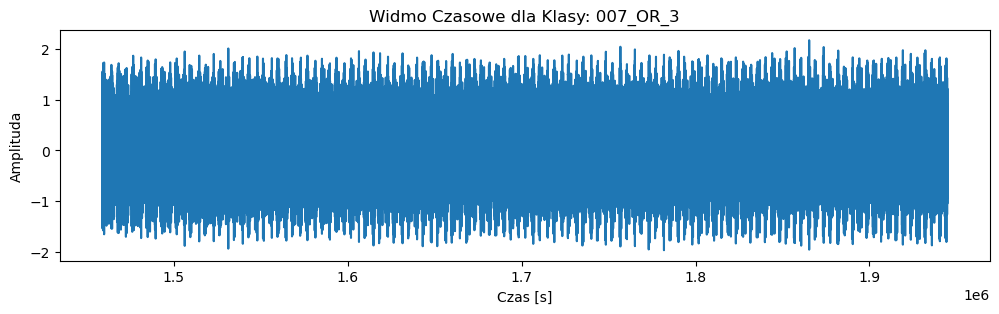

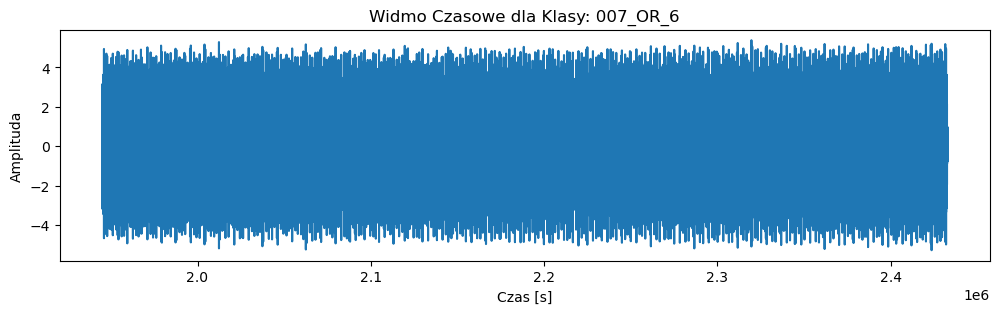

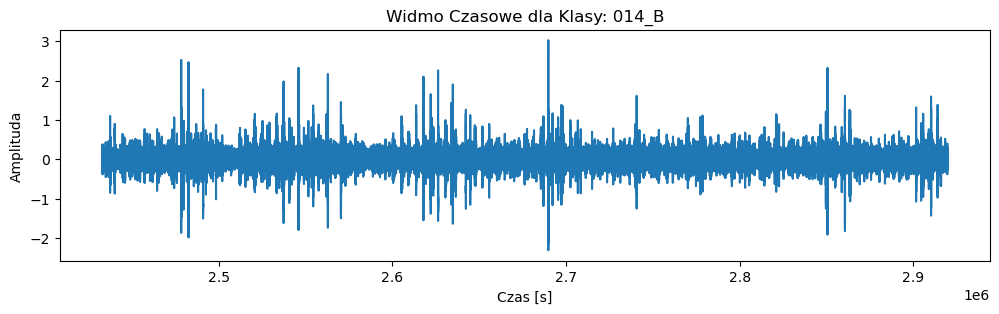

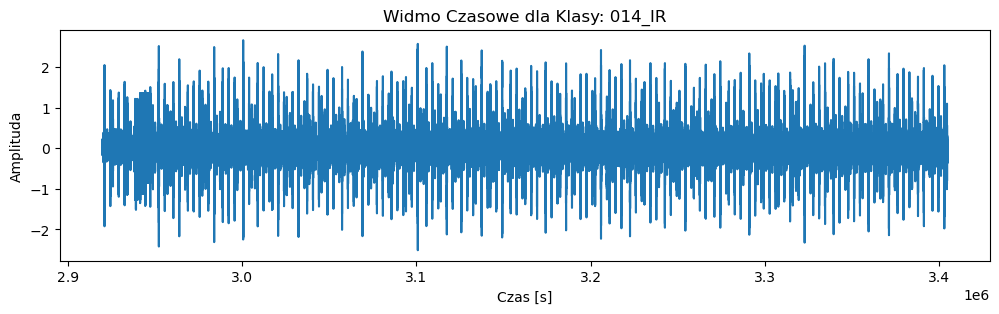

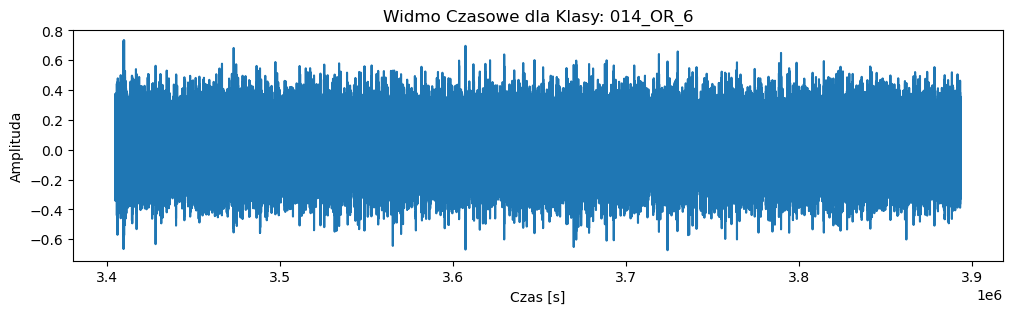

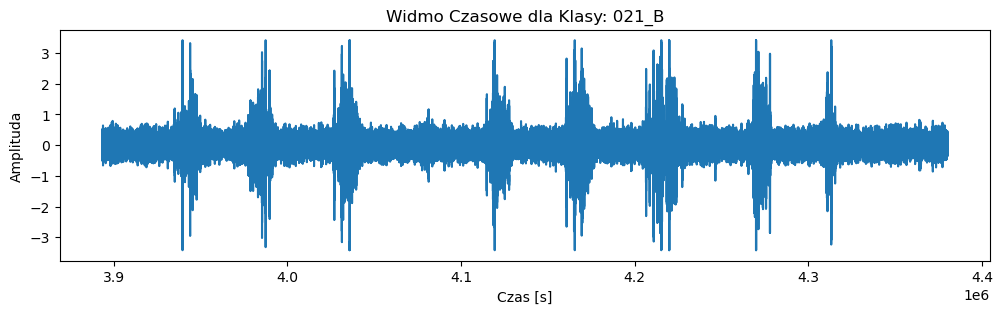

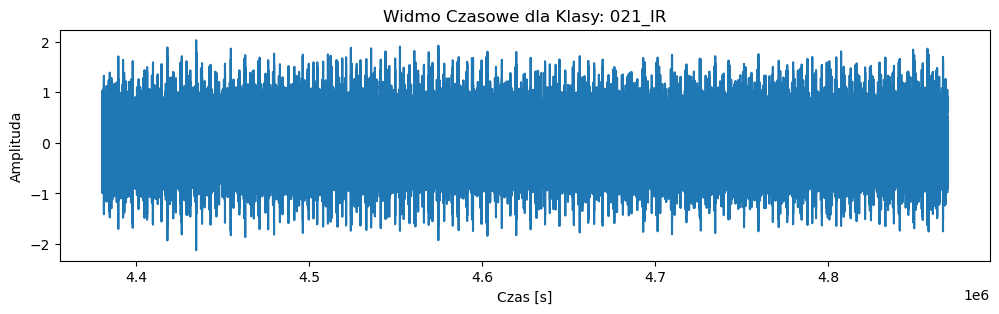

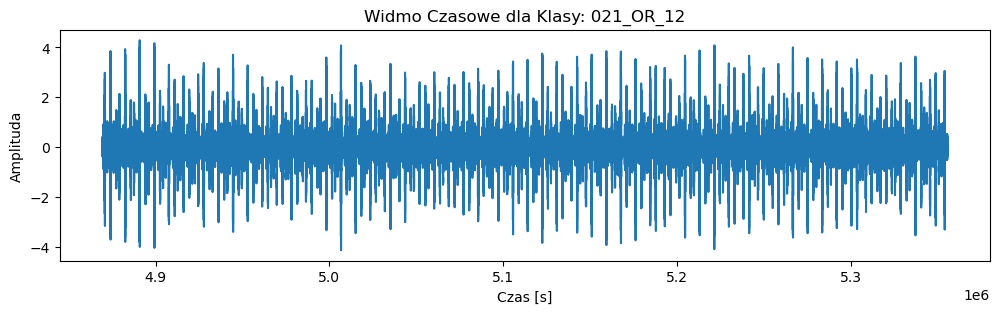

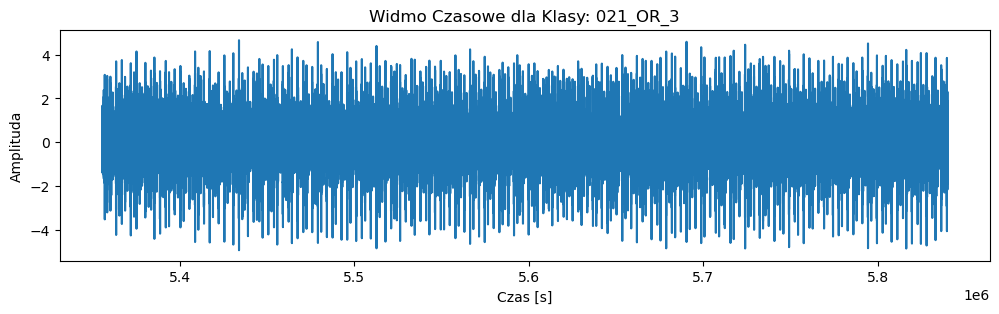

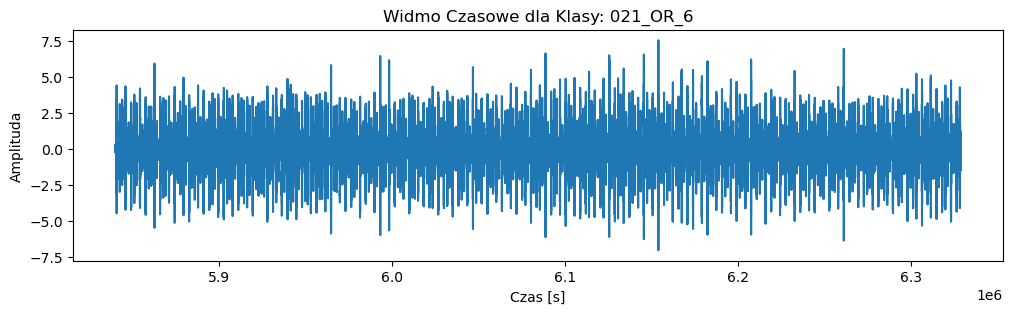

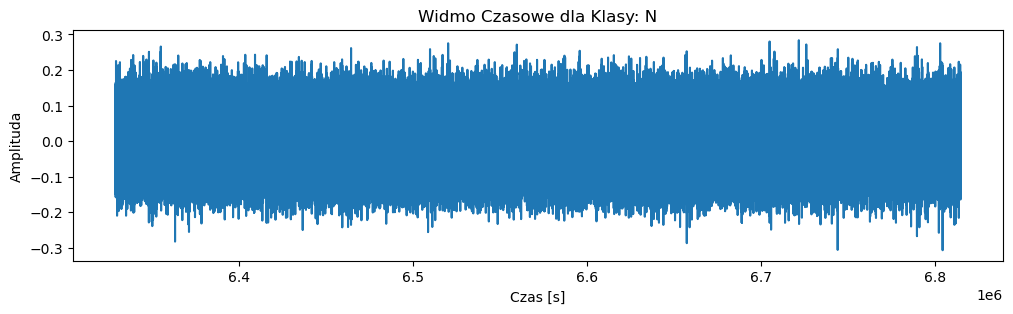

In [8]:
# Odczytanie czasu, amplitudu i klasy
czas_probkowania = 1.0 / 24000  # 24 kHz próbkowanie
t = np.arange(0, len(data) * czas_probkowania, czas_probkowania)
klasy = data['fault'].unique()

# Generacja wykresów surowego sygnału dla każdej klasy
for klasa in klasy:
    
    # Wyświetlanie surowego sygnału
    plt.figure(figsize=(12,3))
    plt.plot(data[data['fault']==klasa].iloc[:,0])
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda')
    plt.title('Widmo Czasowe dla Klasy: {}'.format(klasa))
    plt.show()